In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
col = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
col

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

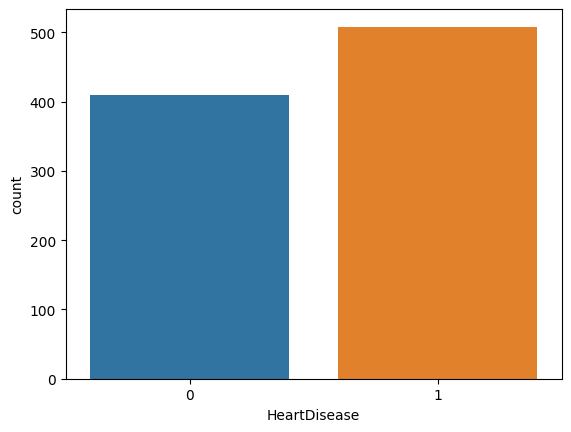

In [7]:
sns.countplot(x='HeartDisease', data=df)

In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [10]:
label_encoders = {}

for column in df.columns:
    if df[column].dtype.name == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [12]:
smote = SMOTE(random_state=42)
X = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']
X_res, y_res = smote.fit_resample(X, y)

In [13]:
y_res_df = pd.DataFrame(y_res, columns=['HeartDisease'])
df_resampled = pd.concat([X_res, y_res_df], axis=1)

In [14]:
df_resampled["HeartDisease"]

0       0
1       1
2       0
3       1
4       0
       ..
1011    0
1012    0
1013    0
1014    0
1015    0
Name: HeartDisease, Length: 1016, dtype: int64

In [15]:
df = df_resampled.copy()

### Calculating z-score

In [16]:
col_mean = df[col].mean()
col_std = df[col].std()

z_score = (df[col] - col_mean)/col_std

z_threshold = 3

In [17]:
newdf = df
newdf.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [18]:
for i in z_score:
    newdf['Z_score'+str(i)]=z_score[i]

In [19]:
newdf.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z_scoreAge,Z_scoreRestingBP,Z_scoreCholesterol,Z_scoreFastingBS,Z_scoreMaxHR,Z_scoreOldpeak
0,40,1,1,140,289,0,1,172,0,0.0,2,0,-1.418017,0.432091,0.826489,-0.519359,1.345887,-0.808628
1,49,0,2,160,180,0,1,156,0,1.0,1,1,-0.451173,1.535673,-0.192750,-0.519359,0.719330,0.153618
2,37,1,1,130,283,0,2,98,0,0.0,2,0,-1.740299,-0.119699,0.770384,-0.519359,-1.551939,-0.808628
3,48,0,0,138,214,0,1,108,1,1.5,1,1,-0.558600,0.321733,0.125178,-0.519359,-1.160341,0.634740
4,54,1,2,150,195,0,1,122,0,0.0,2,0,0.085963,0.983882,-0.052488,-0.519359,-0.612103,-0.808628


### Removing the outlier with the threshold of z-score greater than 3

In [20]:
outliers = np.any(np.abs(z_score) > z_threshold,axis=1)
df1 = df[~outliers]

In [21]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z_scoreAge,Z_scoreRestingBP,Z_scoreCholesterol,Z_scoreFastingBS,Z_scoreMaxHR,Z_scoreOldpeak
0,40,1,1,140,289,0,1,172,0,0.000000,2,0,-1.418017,0.432091,0.826489,-0.519359,1.345887,-0.808628
1,49,0,2,160,180,0,1,156,0,1.000000,1,1,-0.451173,1.535673,-0.192750,-0.519359,0.719330,0.153618
2,37,1,1,130,283,0,2,98,0,0.000000,2,0,-1.740299,-0.119699,0.770384,-0.519359,-1.551939,-0.808628
3,48,0,0,138,214,0,1,108,1,1.500000,1,1,-0.558600,0.321733,0.125178,-0.519359,-1.160341,0.634740
4,54,1,2,150,195,0,1,122,0,0.000000,2,0,0.085963,0.983882,-0.052488,-0.519359,-0.612103,-0.808628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,65,0,2,153,224,0,1,112,0,2.332487,0,0,1.267661,1.149419,0.218686,-0.519359,-1.003701,1.435797
1012,60,0,0,121,222,0,1,86,0,0.000000,2,0,0.730526,-0.616311,0.199984,-0.519359,-2.021856,-0.808628
1013,61,1,0,128,0,0,1,130,0,0.518236,2,0,0.837953,-0.230058,-1.875897,-0.519359,-0.298825,-0.309957
1014,56,0,0,125,461,0,1,89,0,0.642032,0,0,0.300817,-0.395595,2.434829,-0.519359,-1.904377,-0.190836


In [22]:
for i in range(2):
    print(df.shape[i]-df1.shape[i])

26
0


### We have successfully removed 26 outliers from the dataset

In [23]:
df1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Z_scoreAge', 'Z_scoreRestingBP', 'Z_scoreCholesterol',
       'Z_scoreFastingBS', 'Z_scoreMaxHR', 'Z_scoreOldpeak'],
      dtype='object')

In [24]:
columns_to_remove = ['Z_scoreAge', 'Z_scoreRestingBP', 'Z_scoreCholesterol',
                     'Z_scoreFastingBS', 'Z_scoreMaxHR', 'Z_scoreOldpeak']

# Drop the specified columns
df1 = df1.drop(columns=columns_to_remove)

In [25]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [26]:
df1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [27]:
scaler = StandardScaler()

In [28]:
y = df1['HeartDisease']
df1.drop(columns=['HeartDisease'], inplace=True)

In [29]:
X = df1

In [30]:
X_scaled = scaler.fit_transform(X)


In [31]:
X_scaled.shape

(990, 11)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.36,random_state=42)

In [33]:
X_test.shape

(357, 11)

In [34]:
X_train.shape

(633, 11)

In [35]:
def evaluate_model(model, X_valid=X_test, y_valid=y_test):
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_valid, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_valid, y_pred))

In [36]:
model_naive = GaussianNB()
model_naive.fit(X_train,y_train)
evaluate_model(model_naive)

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       182
           1       0.85      0.87      0.86       175

    accuracy                           0.86       357
   macro avg       0.86      0.86      0.86       357
weighted avg       0.86      0.86      0.86       357

Confusion Matrix:
[[156  26]
 [ 23 152]]


In [37]:
model=SVC(kernel='rbf')
model.fit(X_train,y_train)
evaluate_model(model)

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       182
           1       0.85      0.91      0.88       175

    accuracy                           0.87       357
   macro avg       0.88      0.87      0.87       357
weighted avg       0.88      0.87      0.87       357

Confusion Matrix:
[[153  29]
 [ 16 159]]


In [38]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
evaluate_model(log_model)

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       182
           1       0.86      0.86      0.86       175

    accuracy                           0.86       357
   macro avg       0.86      0.86      0.86       357
weighted avg       0.86      0.86      0.86       357

Confusion Matrix:
[[157  25]
 [ 25 150]]


In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(max_depth=12, random_state=0)
rf_model.fit(X_train,y_train)
evaluate_model(rf_model)

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       182
           1       0.88      0.90      0.89       175

    accuracy                           0.89       357
   macro avg       0.89      0.89      0.89       357
weighted avg       0.89      0.89      0.89       357

Confusion Matrix:
[[161  21]
 [ 17 158]]


In [40]:
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [23:58:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [41]:
m1 = XGBClassifier(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=42
)
m1.fit(X_train, y_train)
evaluate_model(m1)

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       182
           1       0.85      0.90      0.88       175

    accuracy                           0.88       357
   macro avg       0.88      0.88      0.88       357
weighted avg       0.88      0.88      0.88       357

Confusion Matrix:
[[155  27]
 [ 17 158]]


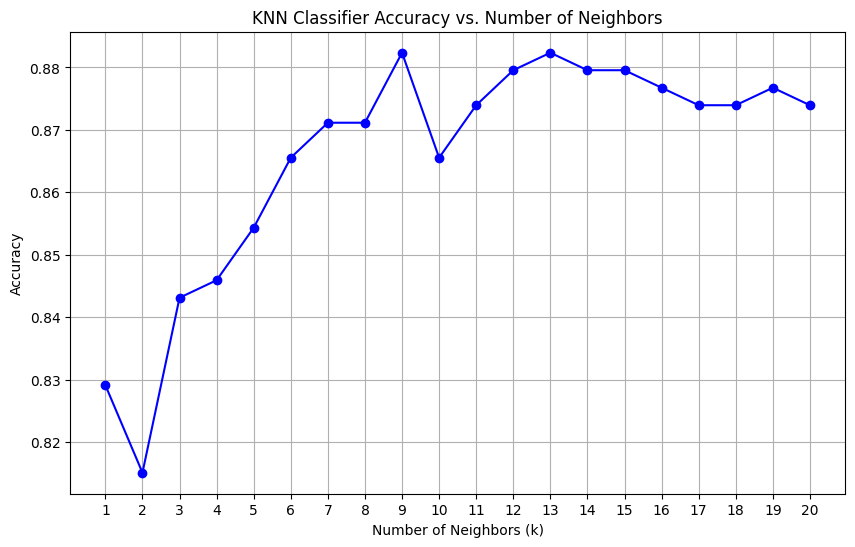

In [42]:
k_range = range(1, 21)  # Range of k values to test
accuracies = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy vs. Number of Neighbors')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [43]:
knnmodel = KNeighborsClassifier(n_neighbors=2)
knnmodel.fit(X_train, y_train)
evaluate_model(knnmodel)

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       182
           1       0.88      0.73      0.79       175

    accuracy                           0.82       357
   macro avg       0.82      0.81      0.81       357
weighted avg       0.82      0.82      0.81       357

Confusion Matrix:
[[164  18]
 [ 48 127]]


In [44]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.000000,2
1,49,0,2,160,180,0,1,156,0,1.000000,1
2,37,1,1,130,283,0,2,98,0,0.000000,2
3,48,0,0,138,214,0,1,108,1,1.500000,1
4,54,1,2,150,195,0,1,122,0,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
1011,65,0,2,153,224,0,1,112,0,2.332487,0
1012,60,0,0,121,222,0,1,86,0,0.000000,2
1013,61,1,0,128,0,0,1,130,0,0.518236,2
1014,56,0,0,125,461,0,1,89,0,0.642032,0


In [45]:
X.shape

(990, 11)

### Now let's do PCA for decomposition or high dimensionality reduction in features

In [46]:

pca = PCA(0.99)
X_pca = pca.fit_transform(X)
X_pca.shape

(990, 3)

In [47]:
pca.explained_variance_ratio_

array([0.91840783, 0.05290019, 0.02303411])

In [48]:
X_trainpca,X_validpca,ytrainpca,yvalidpca=train_test_split(X_pca,y,test_size=0.35,random_state=42)
mdl = SVC(kernel='rbf')
mdl.fit(X_trainpca,ytrainpca)
mdl.score(X_validpca,yvalidpca)

0.7175792507204611

In [49]:
mfl = RandomForestClassifier(max_depth=12, random_state=0)
rf_model.fit(X_trainpca,ytrainpca)
rf_model.score(X_validpca,yvalidpca)

0.7060518731988472

### Using K-Best feature selection and trying the best model which we got from the above predicitve models, as predictive modelling gives us insights about how well a model is fitted and how much accuracy we can accept and we can choose a model for classification

<AxesSubplot: >

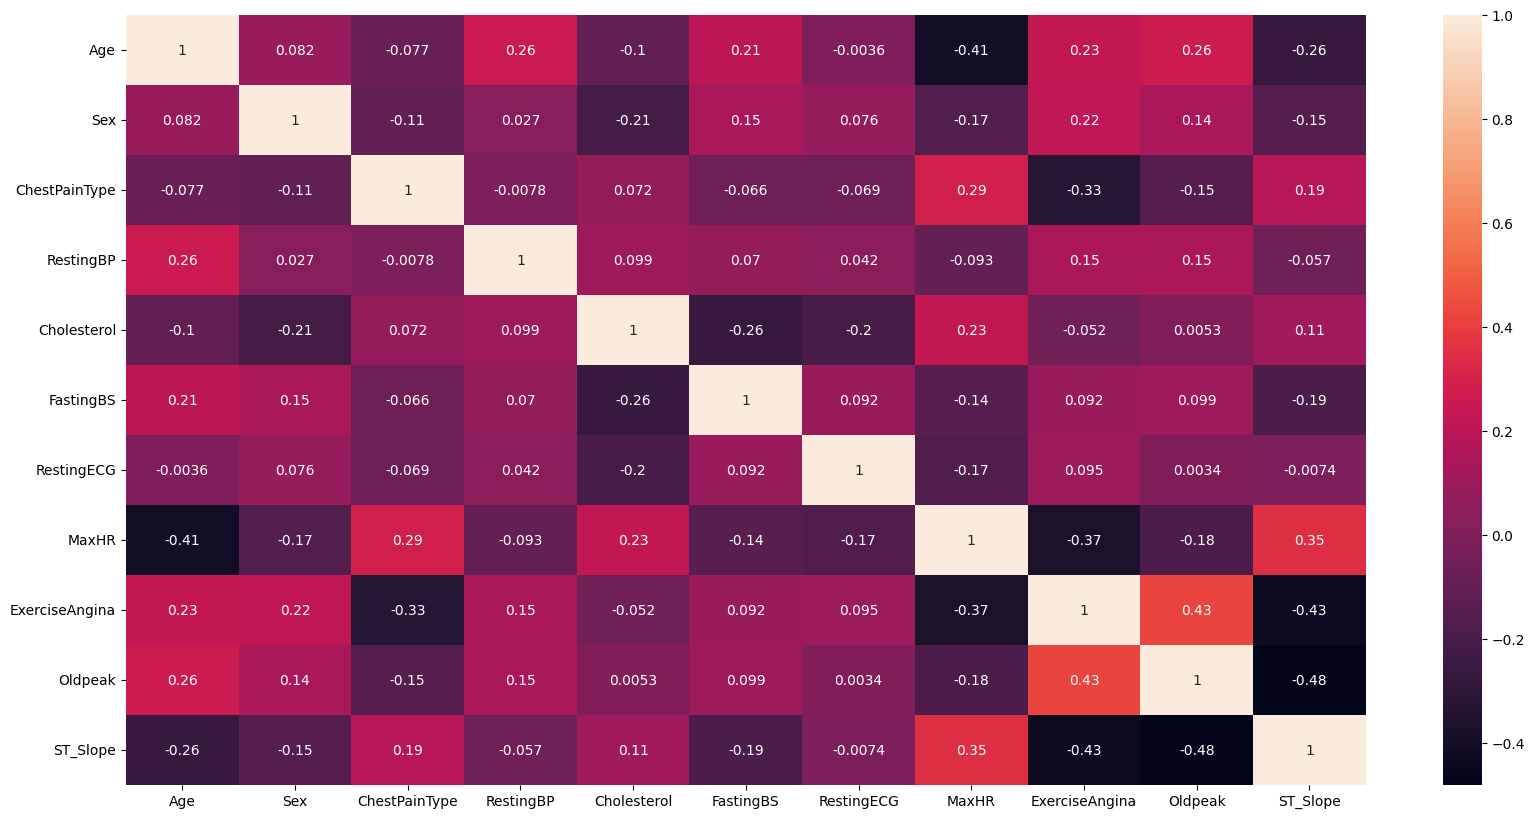

In [50]:
plt.figure(figsize=(20,10))
corr = df1.corr()

sns.heatmap(corr,annot=True)

In [51]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2

In [52]:
def chi_squared_test(df, feature, target):
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
    return chi2_stat

In [53]:
columns = list(df1.columns)

In [54]:
heartdisease_column = df_resampled[['HeartDisease']]
df1 = pd.concat([df1, heartdisease_column], axis=1)

In [55]:
chi2_results = {feature: chi_squared_test(df1, feature, 'HeartDisease') for feature in columns}

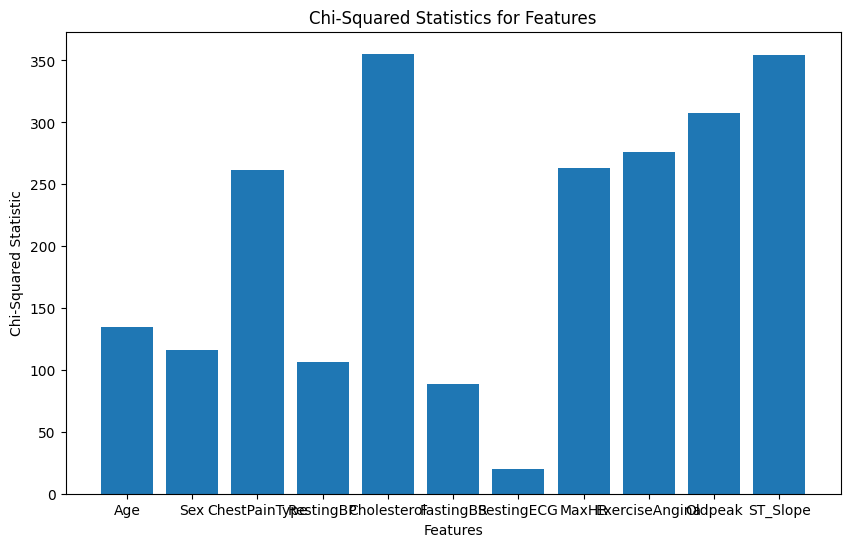

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(chi2_results.keys(), chi2_results.values())
plt.xlabel('Features')
plt.ylabel('Chi-Squared Statistic')
plt.title('Chi-Squared Statistics for Features')
plt.show()

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=42)

In [58]:
X_train_df = pd.DataFrame(X_train, columns=columns)
X_test_df = pd.DataFrame(X_test, columns=columns)
X_train_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.632945,0.571907,2.372017,1.677621,0.701590,-0.518875,-1.568766,-0.504341,-0.754280,-0.836503,1.000877
1,-2.591493,0.571907,0.229410,0.489309,0.606232,-0.518875,0.054095,1.226326,-0.754280,-0.836503,1.000877
2,-1.731643,0.571907,1.300713,-0.817835,0.386910,-0.518875,-1.568766,1.068992,-0.754280,0.217509,-0.675719
3,-1.301718,-1.748536,-0.841893,-0.401926,0.158053,-0.518875,0.054095,-0.819007,-0.754280,-0.836503,1.000877
4,0.095539,0.571907,-0.841893,-0.104848,-1.901668,1.927248,0.054095,-1.094340,1.325768,2.325533,-0.675719
...,...,...,...,...,...,...,...,...,...,...,...
688,-0.334386,0.571907,-0.841893,0.489309,-0.671557,-0.518875,0.054095,-0.111007,-0.754280,-0.836503,1.000877
689,-0.226905,0.571907,1.300713,0.192231,-0.375949,-0.518875,0.054095,0.478992,-0.754280,1.271521,-0.675719
690,1.492796,0.571907,-0.841893,1.677621,0.825554,-0.518875,-1.568766,-1.173007,1.325768,0.744515,-0.675719
691,0.203020,0.571907,1.300713,0.251646,0.272481,-0.518875,1.676957,-0.543674,1.325768,0.849916,-0.675719


In [59]:
chi2_df = pd.DataFrame(chi2_results.items(), columns=['Feature', 'Chi2_Statistic'])
chi2_df = chi2_df.sort_values(by='Chi2_Statistic', ascending=False).reset_index(drop=True)
print("Ranked Features Based on Chi-Squared Statistic:")
print(chi2_df)

Ranked Features Based on Chi-Squared Statistic:
           Feature  Chi2_Statistic
0      Cholesterol      355.516735
1         ST_Slope      354.499328
2          Oldpeak      307.191978
3   ExerciseAngina      276.000290
4            MaxHR      263.134342
5    ChestPainType      261.855500
6              Age      134.420900
7              Sex      116.094083
8        RestingBP      106.710645
9        FastingBS       88.880769
10      RestingECG       19.595972


In [60]:
def model_naive(X_train, y_train, X_test, y_test, features):
    if features:
        # Check if the features exist in X_train and X_test
        valid_features = [feature for feature in features if feature in X_train.columns]
        
        if not valid_features:
            raise ValueError("None of the selected features exist in the DataFrame columns.")
        
        X_train = X_train[valid_features]
        X_test = X_test[valid_features]
    
    model = GaussianNB()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    print(f"Accuracy with features {valid_features}: {accuracy}")
    print()

In [61]:
for i in range(1, 10):
    top_features = chi2_df.head(i)['Feature'].tolist()
    print(f"Top {i} Features: {top_features}")
    model_naive(X_train_df, y_train, X_test_df, y_test, top_features)


Top 1 Features: ['Cholesterol']
Accuracy with features ['Cholesterol']: 0.6397306397306397

Top 2 Features: ['Cholesterol', 'ST_Slope']
Accuracy with features ['Cholesterol', 'ST_Slope']: 0.8181818181818182

Top 3 Features: ['Cholesterol', 'ST_Slope', 'Oldpeak']
Accuracy with features ['Cholesterol', 'ST_Slope', 'Oldpeak']: 0.7845117845117845

Top 4 Features: ['Cholesterol', 'ST_Slope', 'Oldpeak', 'ExerciseAngina']
Accuracy with features ['Cholesterol', 'ST_Slope', 'Oldpeak', 'ExerciseAngina']: 0.8047138047138047

Top 5 Features: ['Cholesterol', 'ST_Slope', 'Oldpeak', 'ExerciseAngina', 'MaxHR']
Accuracy with features ['Cholesterol', 'ST_Slope', 'Oldpeak', 'ExerciseAngina', 'MaxHR']: 0.835016835016835

Top 6 Features: ['Cholesterol', 'ST_Slope', 'Oldpeak', 'ExerciseAngina', 'MaxHR', 'ChestPainType']
Accuracy with features ['Cholesterol', 'ST_Slope', 'Oldpeak', 'ExerciseAngina', 'MaxHR', 'ChestPainType']: 0.8383838383838383

Top 7 Features: ['Cholesterol', 'ST_Slope', 'Oldpeak', 'Exercis

### Now let us perform Deep Learning

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

C:\Dev-Cpp\mingw32\bin\ipykernel_13968\372692519.py:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.36,random_state=42)

In [64]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                                 activation='relu', input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(units=hp.Int('units_2', min_value=32, max_value=256, step=32),
                                 activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [65]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='heart_disease_tuning'
)


Reloading Tuner from my_dir\heart_disease_tuning\tuner0.json


In [66]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

In [67]:
best_model = tuner.get_best_models(num_models=1)[0]

In [68]:
y_pred = (best_model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

12/12 [==============================] - 0s 5ms/step
Accuracy: 0.8711484593837535
Confusion Matrix:
[[161  21]
 [ 25 150]]


In [69]:
def build_naive_bayes_nn(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Dense(num_classes, activation='softmax', use_bias=False)(inputs)
    model = keras.Model(inputs=inputs, outputs=x)
    return model

In [71]:
num_classes = len(np.unique(y))
model = build_naive_bayes_nn(X_train.shape[1:], num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


In [73]:
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

12/12 [==============================] - 0s 2ms/step
Accuracy: 0.8515406162464986
Confusion Matrix:
[[159  23]
 [ 30 145]]


In [74]:
def build_decision_tree_nn(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Dense(64, activation='relu')(inputs)
    x = keras.layers.Dense(32, activation='relu')(x)
    outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [75]:
num_trees = 10
num_classes = len(np.unique(y))
models = [build_decision_tree_nn(X_train.shape[1:], num_classes) for _ in range(num_trees)]

In [76]:
for model in models:
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [77]:
for i, model in enumerate(models):
    print(f"Training tree {i+1}/{num_trees}")
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

Training tree 1/10


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Training tree 2/10
Training tree 3/10
Training tree 4/10
Training tree 5/10
Training tree 6/10
Training tree 7/10
Training tree 8/10
Training tree 9/10
Training tree 10/10


In [78]:
y_pred_proba = np.mean([model.predict(X_test) for model in models], axis=0)
y_pred = np.argmax(y_pred_proba, axis=1)

12/12 [==============================] - 0s 3ms/step


In [79]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8795518207282913
Confusion Matrix:
[[158  24]
 [ 19 156]]
